<a href="https://colab.research.google.com/github/ddiestra/avila-dataset/blob/master/Comparaci%C3%B3n_de_Modelos_Selecci%C3%B3n_de_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Comparación de Modelos  

###Lectura de la Data

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
!unzip avila.zip

--2020-07-05 15:23:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584600 (571K) [application/x-httpd-php]
Saving to: ‘avila.zip’

avila.zip           100%[===================>] 570.90K   736KB/s    in 0.8s    

2020-07-05 15:23:42 (736 KB/s) - ‘avila.zip’ saved [584600/584600]

Archive:  avila.zip
   creating: avila/
  inflating: avila/avila-tr.txt      
  inflating: avila/avila-ts.txt      
  inflating: avila/avila-description.txt  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
file_name = "avila/avila-tr.txt"
column_names = ['intercolumnar_distance', 'upper_margin', 'lower_margin', 'exploitation', 'row_number', 'modular_ratio', 'interlinear_spacing', 'weight', 'peak_number', 'mr_is', 'class'];
dataset = pd.read_csv(file_name,  header=None, names=column_names)
labelencoder.fit(dataset['class']);
dataset['class'] = labelencoder.transform(dataset['class'])

In [ ]:
file_test = "avila/avila-ts.txt"
dataset_test = pd.read_csv(file_test,  header=None, names=column_names)
dataset_test['class'] = labelencoder.transform(dataset_test['class'])

In [ ]:
dataset.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,mr_is,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5


In [ ]:
Y = dataset['class']
X = dataset.drop('class', axis=1)
X.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,mr_is
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652


In [ ]:
Yt = dataset_test['class']
Xt = dataset_test.drop('class', axis=1)
Xt.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,mr_is
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681


Ahora vamos a probar los modelos sin tunearlos

##Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
f1_score(Yt, dt.predict(Xt), average='weighted')

0.9691059306983082

##Random Forest

In [ ]:
rf = RandomForestClassifier(40, n_jobs=-1, oob_score=True)
rf.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
f1_score(Yt, rf.predict(Xt), average='weighted')

0.9836990551679825

##Clasificador K-Nearest Neighbor

In [ ]:
n_neighbors = 4

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
f1_score(Yt, knn.predict(Xt), average='weighted')

0.7460663076554264

##Neural Networks

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow.python.keras, math
from sklearn.model_selection import train_test_split

In [ ]:
lr = 0.01
bs = 256
epochs = 30
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

nn = Sequential([
    Dense(12, activation='softmax', input_shape=(10,))
])

nn.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12)                132       
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/30
33/33 [==============================] - 0s 5ms/step - loss: 2.8606 - accuracy: 0.1308 - val_loss: 2.8011 - val_accuracy: 0.1371
Epoch 2/30
33/33 [==============================] - 0s 3ms/step - loss: 2.7655 - accuracy: 0.1504 - val_loss: 2.7127 - val_accuracy: 0.1548
Epoch 3/30
33/33 [==============================] - 0s 3ms/step - loss: 2.6760 - accuracy: 0.1738 - val_loss: 2.6297 - val_accuracy: 0.1745
Epoch 4/30
33/33 [==============================] - 0s 3ms/step - loss: 2.5922 - accuracy: 0.1955 - val_loss: 2.5518 - val_accuracy: 0.1898
Epoch 5/30
33/33 [==============================] - 0s 3ms/step - loss: 2.5129 - accuracy: 0.2186 - val_loss: 2.4792 - val_accuracy: 0.2124
Epoch 6/30
33/33 [==============================] - 0s 3ms/step - loss: 2.4400 - accuracy: 0.2402 - val_loss: 2.4119 - val_accuracy: 0.2359
Epoch 7/30
33/33 [==============================] - 0s 3ms/step - loss: 2.3735 - accuracy: 0.2605 - val_loss: 2.3493 - val_accuracy: 0.2570
Epoch 8/30
33/33 [==

In [ ]:
xt_predict = np.argmax(nn.predict(Xt), axis=1)
f1_score(Yt, xt_predict, average='weighted')

0.3656546586309501

##Seleccion de Caracteristicas

###Por Filtrado

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

In [ ]:
filtrado = SelectKBest(mutual_info_classif, k=5).fit(X, Y)

In [ ]:
filtrado.scores_

array([0.81105729, 0.87362188, 0.9442109 , 1.81754017, 0.50651796,
       0.10027254, 0.29893599, 0.02695265, 0.29774187, 0.08390339])

In [ ]:
X_new = filtrado.transform(X)
X_new[:5]

array([[ 0.266074, -0.16562 ,  0.32098 ,  0.483299,  0.17234 ],
       [ 0.130292,  0.870736, -3.210528,  0.062493,  0.261718],
       [-0.116585,  0.069915,  0.068476, -0.783147,  0.261718],
       [ 0.031541,  0.2976  , -3.210528, -0.58359 , -0.721442],
       [ 0.229043,  0.807926, -0.052442,  0.082634,  0.261718]])

In [ ]:
Xt.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,mr_is
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681


Implementamos un bucle por cada modelo y vemos los resutlados de usar las k caracteristicas

####Decision Tree

In [ ]:
max = 0
features = 0
for n in range(10):
  filter = SelectKBest(mutual_info_classif, k=(n+1)).fit(X, Y)
  X_new = filter.transform(X)
  Xt_new = filter.transform(Xt)
  dt2 = DecisionTreeClassifier()
  dt2.fit(X_new, Y)
  acc = dt2.score(Xt_new, Yt)
  f1 = f1_score(Yt, dt2.predict(Xt_new), average='weighted')
  print('Score usando ', (n+1), 'caracteristicas F1:',  f1, ' acurracy: ', acc )
  if f1 > max:
      max = f1
      features = n+1
print('Mejor Score usando ', features, 'caracteristicas F1:',  max)

Score usando  1 caracteristicas F1: 0.995600072381871  acurracy:  0.9955926032384785
Score usando  2 caracteristicas F1: 0.9989640727934304  acurracy:  0.9989460572961579
Score usando  3 caracteristicas F1: 0.9994426717770257  acurracy:  0.9994251221615407
Score usando  4 caracteristicas F1: 0.9994426717770257  acurracy:  0.9994251221615407
Score usando  5 caracteristicas F1: 0.9994426717770257  acurracy:  0.9994251221615407
Score usando  6 caracteristicas F1: 0.9886105118230989  acurracy:  0.98859825620389
Score usando  7 caracteristicas F1: 0.9855349206489854  acurracy:  0.9855322410654402
Score usando  8 caracteristicas F1: 0.974561346682597  acurracy:  0.9745137491616365
Score usando  9 caracteristicas F1: 0.9737596544575153  acurracy:  0.9737472453770241
Score usando  10 caracteristicas F1: 0.9701469042128404  acurracy:  0.970106352400115
Mejor Score usando  3 caracteristicas F1: 0.9994426717770257


####Random Forest

In [ ]:
max = 0
features = 0
for n in range(10):
  filter = SelectKBest(mutual_info_classif, k=(n+1)).fit(X, Y)
  X_new = filter.transform(X)
  Xt_new = filter.transform(Xt)
  rt2 = RandomForestClassifier(40, n_jobs=-1, oob_score=True)
  rt2.fit(X_new, Y)
  acc = rt2.score(Xt_new, Yt)
  f1 = f1_score(Yt, rt2.predict(Xt_new), average='weighted')
  print('Score usando ', (n+1), 'caracteristicas F1:',  f1, ' acurracy: ', acc )
  if f1 > max:
      max = f1
      features = n+1
print('Mejor Score usando ', features, 'caracteristicas F1:',  max)

Score usando  1 caracteristicas F1: 0.9956251275246324  acurracy:  0.9955926032384785
Score usando  2 caracteristicas F1: 0.9989640727934304  acurracy:  0.9989460572961579
Score usando  3 caracteristicas F1: 0.9994426717770257  acurracy:  0.9994251221615407
Score usando  4 caracteristicas F1: 0.9994426717770257  acurracy:  0.9994251221615407
Score usando  5 caracteristicas F1: 0.9994426717770257  acurracy:  0.9994251221615407
Score usando  6 caracteristicas F1: 0.9956963382340839  acurracy:  0.995688416211555
Score usando  7 caracteristicas F1: 0.9950206681876904  acurracy:  0.9950177254000192
Score usando  8 caracteristicas F1: 0.988871497177574  acurracy:  0.9888856951231196
Score usando  9 caracteristicas F1: 0.9868541212116453  acurracy:  0.986873622688512
Score usando  10 caracteristicas F1: 0.9809057290424358  acurracy:  0.9809332183577656
Mejor Score usando  3 caracteristicas F1: 0.9994426717770257


####KNN

In [ ]:
max = 0
features = 0
for n in range(10):
  filter = SelectKBest(mutual_info_classif, k=(n+1)).fit(X, Y)
  X_new = filter.transform(X)
  Xt_new = filter.transform(Xt)
  n_neighbors = 4
  knn2 = KNeighborsClassifier(n_neighbors)
  knn2.fit(X_new, Y)
  acc = knn2.score(Xt_new, Yt)
  f1 = f1_score(Yt, knn2.predict(Xt_new), average='weighted')
  print('Score usando ', (n+1), 'caracteristicas F1:',  f1, ' acurracy: ', acc )
  if f1 > max:
      max = f1
      features = n+1
print('Mejor Score usando ', features, 'caracteristicas F1:',  max)


Score usando  1 caracteristicas F1: 0.9951473769678082  acurracy:  0.9954009772923254
Score usando  2 caracteristicas F1: 0.9983245112969483  acurracy:  0.9985628054038517
Score usando  3 caracteristicas F1: 0.9987117932315139  acurracy:  0.9989460572961579
Score usando  4 caracteristicas F1: 0.9987117932315139  acurracy:  0.9989460572961579
Score usando  5 caracteristicas F1: 0.9987117932315139  acurracy:  0.9989460572961579
Score usando  6 caracteristicas F1: 0.9062098816720439  acurracy:  0.9067739771965124
Score usando  7 caracteristicas F1: 0.8305037368294843  acurracy:  0.833093800900642
Score usando  8 caracteristicas F1: 0.7732201394396423  acurracy:  0.7783845932739293
Score usando  9 caracteristicas F1: 0.7540992662801503  acurracy:  0.7607550062278432
Score usando  10 caracteristicas F1: 0.7460663076554264  acurracy:  0.7525150905432596
Mejor Score usando  3 caracteristicas F1: 0.9987117932315139


####NN

In [ ]:
max = 0
features = 0
lr = 0.01
bs = 256
epochs = 30
for n in range(10):
  filter = SelectKBest(mutual_info_classif, k=(n+1)).fit(X, Y)
  X_new = filter.transform(X)
  Xt_new = filter.transform(Xt)
  x_train, x_val, y_train, y_val = train_test_split(X_new, Y, test_size=0.2, random_state=42)

  nn2 = Sequential([
      Dense(12, activation='softmax', input_shape=((n+1),))
  ])

  nn2.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  nn2.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=(x_val, y_val), verbose=0 )
  xt_predict = np.argmax(nn2.predict(Xt_new), axis=1)

  f1 = f1_score(Yt, xt_predict, average='weighted')
  print('Score usando ', (n+1), 'caracteristicas F1:',  f1)
  if f1 > max:
      max = f1
      features = n+1
print('Mejor Score usando ', features, 'caracteristicas F1:',  max)

Score usando  1 caracteristicas F1: 0.24048071355465453
Score usando  2 caracteristicas F1: 0.23745780749302492
Score usando  3 caracteristicas F1: 0.23947917724395337
Score usando  4 caracteristicas F1: 0.24519265336868906
Score usando  5 caracteristicas F1: 0.24405481138250698
Score usando  6 caracteristicas F1: 0.31614515111787284
Score usando  7 caracteristicas F1: 0.34209352755129924
Score usando  8 caracteristicas F1: 0.3584786459073436
Score usando  9 caracteristicas F1: 0.3858780035791726
Score usando  10 caracteristicas F1: 0.3632503491447995
Mejor Score usando  9 caracteristicas F1: 0.3858780035791726


###Por wrapping - Backward elimination

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

####Decision Tree

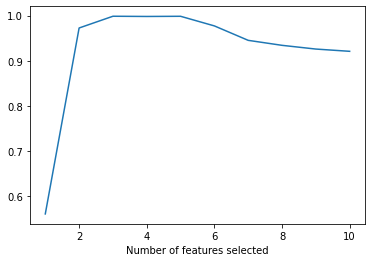

In [ ]:
model = DecisionTreeClassifier()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),scoring='accuracy')
rfecv.fit(X, Y)
plt.figure()
plt.xlabel("Number of features selected")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.n_features_

3

In [ ]:
X_new = rfecv.transform(X)
Xt_new = rfecv.transform(Xt)
dt3 = DecisionTreeClassifier()
dt3.fit(X_new, Y)
acc = dt3.score(Xt_new, Yt)
f1 = f1_score(Yt, dt3.predict(Xt_new), average='weighted')
print('F1 Score: ', f1)

F1 Score:  0.9994426717770257


####Random Forest

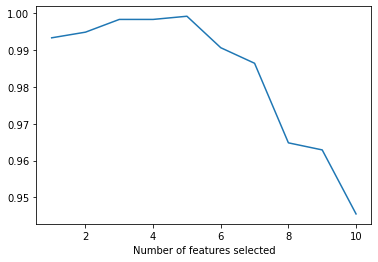

In [ ]:
model = RandomForestClassifier(40, n_jobs=-1, oob_score=True)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),scoring='accuracy')
rfecv.fit(X, Y)
plt.figure()
plt.xlabel("Number of features selected")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.n_features_

5

In [ ]:
X_new = rfecv.transform(X)
Xt_new = rfecv.transform(Xt)
rf3 = RandomForestClassifier(40, n_jobs=-1, oob_score=True)
rf3.fit(X_new, Y)
acc = rf3.score(Xt_new, Yt)
f1 = f1_score(Yt, rf3.predict(Xt_new), average='weighted')
print('F1 Score: ', f1)

F1 Score:  0.9994426717770257


####KKN y Neural Network

KNN no expone la importancia de los features asi que no se puede analizar con RFECV y en las Neural Network tambien es complicado extraer esa informacion

###PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
pca = PCA().fit(X)
pd.DataFrame(pca.components_, columns=X.columns).head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,mr_is
0,-0.009083,0.957011,0.121752,0.007317,-0.013462,0.129084,0.204408,0.013400,0.101592,0.006565
1,-0.061582,0.169811,-0.014367,-0.380148,-0.221999,-0.500088,-0.288850,-0.154483,-0.316687,-0.561864
2,0.138759,0.015781,0.179414,0.264940,0.188124,-0.361977,-0.229689,0.558442,0.520789,-0.275428
3,-0.659258,-0.000829,-0.072878,0.251677,-0.614244,0.077167,-0.096610,0.319141,-0.012061,0.046319
4,0.046082,0.132249,-0.908548,-0.194622,0.093387,0.063997,-0.209929,0.141306,0.192317,0.056644


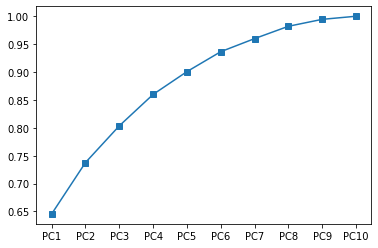

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=5)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.plot(labels, np.cumsum(pca.explained_variance_ratio_), '-s')
plt.show()

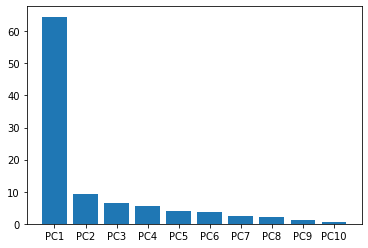

In [ ]:
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label = labels)
plt.show()

####Decision Tree

In [ ]:
max = 0
components = 0
for n in range(10):
  pca = PCA(n_components=(n+1))
  X_new = pca.fit_transform(X)
  Xt_new = pca.transform(Xt)
  dt4 = DecisionTreeClassifier()
  dt4.fit(X_new, Y)
  acc = dt4.score(Xt_new, Yt)
  f1 = f1_score(Yt, dt4.predict(Xt_new), average='weighted')
  print('Score usando ', (n+1), 'componentes F1:',  f1, ' acurracy: ', acc )
  if f1 > max:
      max = f1
      components = n+1
print('Mejor Score usando ', components, 'componentes F1:',  max)

Score usando  1 componentes F1: 0.2743568281314741  acurracy:  0.2743125419181757
Score usando  2 componentes F1: 0.33207167444371993  acurracy:  0.3304589441410367
Score usando  3 componentes F1: 0.4047887707738856  acurracy:  0.4031809907061416
Score usando  4 componentes F1: 0.5087510822010975  acurracy:  0.5080961962249688
Score usando  5 componentes F1: 0.540992201384299  acurracy:  0.5400977292325381
Score usando  6 componentes F1: 0.5580209558995907  acurracy:  0.5565775606017055
Score usando  7 componentes F1: 0.6243048741517969  acurracy:  0.6240298936475999
Score usando  8 componentes F1: 0.6333301935353234  acurracy:  0.632173996359107
Score usando  9 componentes F1: 0.6412902033039984  acurracy:  0.640126473124461
Score usando  10 componentes F1: 0.6422116964807684  acurracy:  0.6412762288013797
Mejor Score usando  10 componentes F1: 0.6422116964807684


In [ ]:
max = 0
components = 0
for n in range(10):
  pca = PCA(n_components=(n+1))
  X_new = pca.fit_transform(X)
  Xt_new = pca.transform(Xt)
  rf4 = RandomForestClassifier(40, n_jobs=-1, oob_score=True)
  rf4.fit(X_new, Y)
  acc = rf4.score(Xt_new, Yt)
  f1 = f1_score(Yt, rf4.predict(Xt_new), average='weighted')
  print('Score usando ', (n+1), 'componentes F1:',  f1, ' acurracy: ', acc )
  if f1 > max:
      max = f1
      components = n+1
print('Mejor Score usando ', components, 'componentes F1:',  max)

Score usando  1 componentes F1: 0.2749037469416072  acurracy:  0.2750790457027882
Score usando  2 componentes F1: 0.37681149099575095  acurracy:  0.3983903420523139
Score usando  3 componentes F1: 0.4732583958178551  acurracy:  0.5047427421672894
Score usando  4 componentes F1: 0.5870274711428315  acurracy:  0.6064961195745904
Score usando  5 componentes F1: 0.6440431867887464  acurracy:  0.6602471974705375
Score usando  6 componentes F1: 0.6621817350698744  acurracy:  0.6784516623550829
Score usando  7 componentes F1: 0.7267762588495243  acurracy:  0.7357478202548625
Score usando  8 componentes F1: 0.7519667956105452  acurracy:  0.7594136246047715
Score usando  9 componentes F1: 0.7683229160339771  acurracy:  0.7750311392162499
Score usando  10 componentes F1: 0.7604426973155152  acurracy:  0.7686116700201208
Mejor Score usando  9 componentes F1: 0.7683229160339771


In [ ]:
max = 0
components = 0
for n in range(10):
  pca = PCA(n_components=(n+1))
  X_new = pca.fit_transform(X)
  Xt_new = pca.transform(Xt)
  knn4 = KNeighborsClassifier(4)
  knn4.fit(X_new, Y)
  acc = knn4.score(Xt_new, Yt)
  f1 = f1_score(Yt, knn4.predict(Xt_new), average='weighted')
  print('Score usando ', (n+1), 'componentes F1:',  f1, ' acurracy: ', acc )
  if f1 > max:
      max = f1
      components = n+1
print('Mejor Score usando ', components, 'componentes F1:',  max)

Score usando  1 componentes F1: 0.2972770241113103  acurracy:  0.35240011497556767
Score usando  2 componentes F1: 0.3697741875204541  acurracy:  0.40634281881766793
Score usando  3 componentes F1: 0.44457512458753606  acurracy:  0.4773402318673948
Score usando  4 componentes F1: 0.5568326103147813  acurracy:  0.5785187314362364
Score usando  5 componentes F1: 0.6153857628005514  acurracy:  0.6289163552745042
Score usando  6 componentes F1: 0.6377833166047439  acurracy:  0.6511449650282648
Score usando  7 componentes F1: 0.7101383436372846  acurracy:  0.7183098591549296
Score usando  8 componentes F1: 0.7355803369231538  acurracy:  0.7419756635048386
Score usando  9 componentes F1: 0.7477476843298266  acurracy:  0.7539522851394079
Score usando  10 componentes F1: 0.7460663076554264  acurracy:  0.7525150905432596
Mejor Score usando  9 componentes F1: 0.7477476843298266
